In [1]:
import zipfile
import os

def unzip_data(zip_path, extract_to):
    with zipfile.ZipFile(zip_path, 'r') as zip_ref:
        zip_ref.extractall(extract_to)

# Define paths
train_zip = '/content/drive/MyDrive/Suhora_asgn/train.zip'
valid_zip = '/content/drive/MyDrive/Suhora_asgn/valid.zip'
test_zip = '/content/drive/MyDrive/Suhora_asgn/test.zip'

# Extract datasets
unzip_data(train_zip, 'data/train')
unzip_data(valid_zip, 'data/valid')
unzip_data(test_zip, 'data/test')

In [ ]:
import pandas as pd

meta_data_path = 'metadata.csv'
meta_data = pd.read_csv(meta_data_path)

# Sample
print(meta_data.head())

   image_id  split        sat_image_path              mask_path
0    100034  train  train/100034_sat.jpg  train/100034_mask.png
1    100081  train  train/100081_sat.jpg  train/100081_mask.png
2    100129  train  train/100129_sat.jpg  train/100129_mask.png
3    100703  train  train/100703_sat.jpg  train/100703_mask.png
4    100712  train  train/100712_sat.jpg  train/100712_mask.png


In [ ]:
base_path = '/content/data'

In [ ]:
import os

# Adjust the path as needed based on your directory structure
base_image_path = '/content/data/train/'
base_mask_path = '/content/data/train/'

# Check if directories exist
if not os.path.exists(base_image_path):
    print(f"Directory {base_image_path} does not exist.")
if not os.path.exists(base_mask_path):
    print(f"Directory {base_mask_path} does not exist.")

In [ ]:
import shutil

# Create directories for separated images and masks
os.makedirs(os.path.join(base_path, 'train_images'), exist_ok=True)
os.makedirs(os.path.join(base_path, 'train_masks'), exist_ok=True)

# Move images and masks
for _, row in meta_data.iterrows():
    if row['split'] == 'train':
        image_path = os.path.join(base_image_path, row['sat_image_path'].replace('train/', ''))
        mask_path = os.path.join(base_mask_path, row['mask_path'].replace('train/', ''))

        # Check if paths exist before moving
        if os.path.exists(image_path) and os.path.exists(mask_path):
            shutil.move(image_path, os.path.join(base_path, 'train_images'))
            shutil.move(mask_path, os.path.join(base_path, 'train_masks'))
        else:
            print(f"File not found: {image_path} or {mask_path}")

In [ ]:
for _, row in meta_data.iterrows():
    if row['split'] == 'train':
        image_path = os.path.join(base_image_path, row['sat_image_path'].replace('train/', ''))
        mask_path = os.path.join(base_mask_path, row['mask_path'].replace('train/', ''))

        print(f"Moving image from: {image_path} to: {os.path.join(base_path, 'train_images')}")
        print(f"Moving mask from: {mask_path} to: {os.path.join(base_path, 'train_masks')}")

        if os.path.exists(image_path) and os.path.exists(mask_path):
            shutil.move(image_path, os.path.join(base_path, 'train_images'))
            shutil.move(mask_path, os.path.join(base_path, 'train_masks'))
        else:
            print(f"File not found: {image_path} or {mask_path}")

Streaming output truncated to the last 5000 lines.
Moving mask from: /content/data/train/754539_mask.png to: /content/data/train_masks
File not found: /content/data/train/754539_sat.jpg or /content/data/train/754539_mask.png
Moving image from: /content/data/train/754670_sat.jpg to: /content/data/train_images
Moving mask from: /content/data/train/754670_mask.png to: /content/data/train_masks
File not found: /content/data/train/754670_sat.jpg or /content/data/train/754670_mask.png
Moving image from: /content/data/train/754944_sat.jpg to: /content/data/train_images
Moving mask from: /content/data/train/754944_mask.png to: /content/data/train_masks
File not found: /content/data/train/754944_sat.jpg or /content/data/train/754944_mask.png
Moving image from: /content/data/train/754948_sat.jpg to: /content/data/train_images
Moving mask from: /content/data/train/754948_mask.png to: /content/data/train_masks
File not found: /content/data/train/754948_sat.jpg or /content/data/train/754948_mask.pn

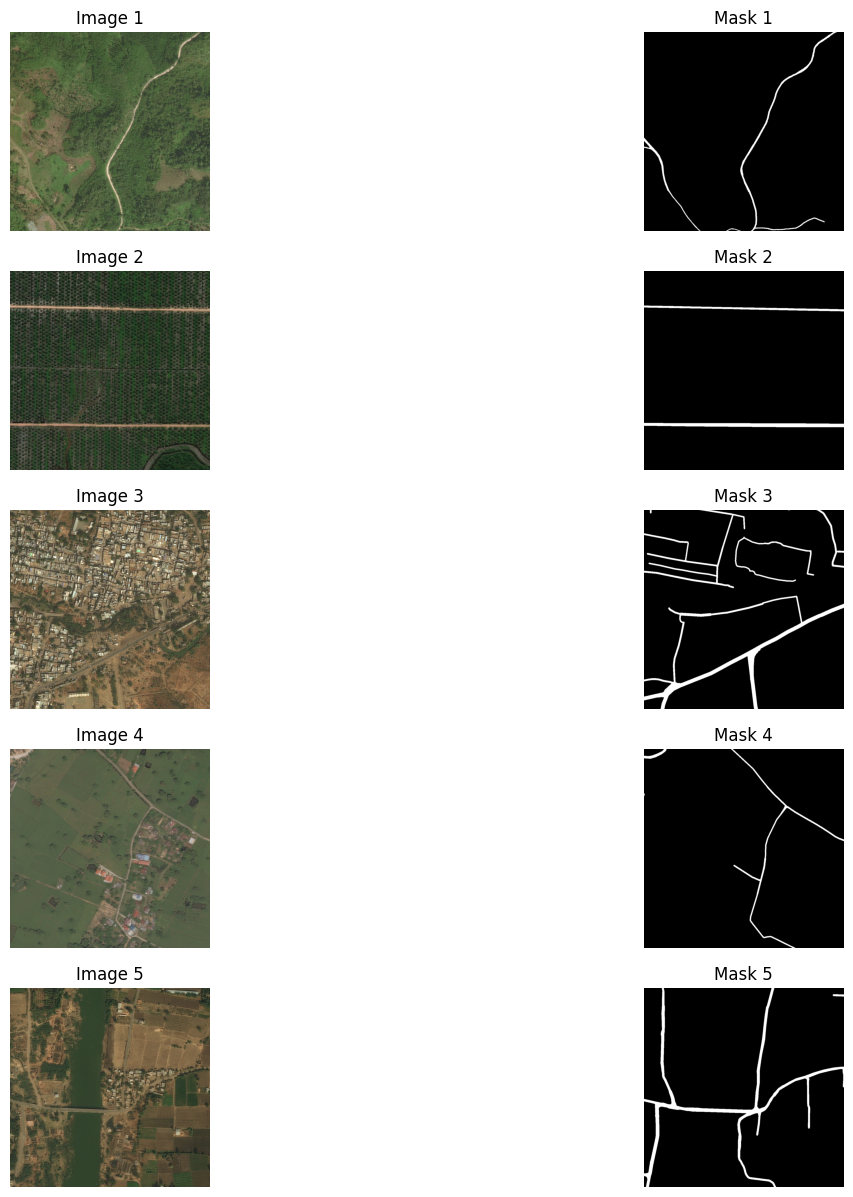

In [2]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import os

def load_image(image_path, resize_to=(1024, 1024)):
    img = cv2.imread(image_path)
    if img is not None:
        img = cv2.resize(img, resize_to)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert from BGR to RGB
    return img

def load_mask(mask_path, resize_to=(1024, 1024)):
    mask = cv2.imread(mask_path, cv2.IMREAD_GRAYSCALE)
    if mask is not None:
        mask = cv2.resize(mask, resize_to)
        _, mask = cv2.threshold(mask, 128, 255, cv2.THRESH_BINARY)
    return mask

def display_images(images, masks=None, num_images=5):
    plt.figure(figsize=(15, num_images * 3))

    for i in range(min(num_images, len(images))):
        plt.subplot(num_images, 2, 2 * i + 1)
        plt.imshow(images[i])
        plt.title(f"Image {i+1}")
        plt.axis('off')

        if masks:
            plt.subplot(num_images, 2, 2 * i + 2)
            plt.imshow(masks[i], cmap='gray')
            plt.title(f"Mask {i+1}")
            plt.axis('off')

    plt.show()

# Paths to images and masks
train_dir = '/content/data/train'

# Load image and mask files
image_files = sorted([f for f in os.listdir(train_dir) if '_sat.jpg' in f])
mask_files = sorted([f for f in os.listdir(train_dir) if '_mask.png' in f])

# Ensure we have images and masks to load
if len(image_files) == 0 or len(mask_files) == 0:
    print("No images or masks found in the specified directories.")
else:
    # Load the first few images and masks
    images = [load_image(os.path.join(train_dir, img_file)) for img_file in image_files[:5]]
    masks = [load_mask(os.path.join(train_dir, mask_file)) for mask_file in mask_files[:5]]

    # Display images and masks
    display_images(images, masks=masks)

In [ ]:
from PIL import Image
import numpy as np

def binarize_mask(mask_path, threshold=128):
    mask = Image.open(mask_path).convert('L')
    mask_np = np.array(mask)
    binary_mask = np.where(mask_np > threshold, 255, 0).astype(np.uint8)
    return Image.fromarray(binary_mask)

# Apply binarization to all masks
mask_dir = os.path.join(base_path, 'train_masks')
for mask_file in os.listdir(mask_dir):
    mask_path = os.path.join(mask_dir, mask_file)
    binary_mask = binarize_mask(mask_path)
    binary_mask.save(mask_path)  # Overwrite with binarized mask

In [ ]:
import tensorflow as tf

def create_dataset(image_dir, mask_dir, batch_size):
    image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')])
    mask_files = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.png')])

    def load_image(img_path, mask_path):
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [1024, 1024])
        img = img / 255.0

        mask = tf.io.read_file(mask_path)
        mask = tf.image.decode_png(mask, channels=1)
        mask = tf.image.resize(mask, [1024, 1024])
        mask = mask / 255.0

        return img, mask

    dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
    dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

train_dataset = create_dataset(os.path.join(base_path, 'train_images'), os.path.join(base_path, 'train_masks'), batch_size=8)

In [ ]:
import tensorflow as tf

def unet_model(input_size=(1024, 1024, 3)):
    inputs = tf.keras.Input(input_size)

    # Encoder
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(inputs)
    conv1 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv1)
    pool1 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv1)

    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(pool1)
    conv2 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv2)
    pool2 = tf.keras.layers.MaxPooling2D(pool_size=(2, 2))(conv2)

    # Bottleneck
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(pool2)
    conv3 = tf.keras.layers.Conv2D(256, 3, activation='relu', padding='same')(conv3)

    # Decoder
    up4 = tf.keras.layers.Conv2DTranspose(128, 2, strides=(2, 2), padding='same')(conv3)
    concat4 = tf.keras.layers.Concatenate()([up4, conv2])
    conv4 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(concat4)
    conv4 = tf.keras.layers.Conv2D(128, 3, activation='relu', padding='same')(conv4)

    up5 = tf.keras.layers.Conv2DTranspose(64, 2, strides=(2, 2), padding='same')(conv4)
    concat5 = tf.keras.layers.Concatenate()([up5, conv1])
    conv5 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(concat5)
    conv5 = tf.keras.layers.Conv2D(64, 3, activation='relu', padding='same')(conv5)

    outputs = tf.keras.layers.Conv2D(1, 1, activation='sigmoid')(conv5)

    model = tf.keras.Model(inputs, outputs)
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model

In [ ]:
valid_dataset = '/content/data/valid'

In [ ]:
model = unet_model()

In [ ]:
small_train_dataset = train_dataset.take(100)

In [ ]:
import os
import shutil

valid_image_dir = '/content/data/valid'
subset_valid_image_dir = '/content/data/valid_subset'

os.makedirs(subset_valid_image_dir, exist_ok=True)

# List all files in the original validation directory
valid_image_files = [f for f in os.listdir(valid_image_dir) if f.endswith('.jpg') or f.endswith('.png')]

# Select only 50 files
selected_files = valid_image_files[:50]  # Adjust the number as needed

# Copy the selected files to the new directory
for file_name in selected_files:
    src_path = os.path.join(valid_image_dir, file_name)
    dst_path = os.path.join(subset_valid_image_dir, file_name)
    shutil.copy(src_path, dst_path)

In [ ]:
import tensorflow as tf

# Function to create dataset
def create_dataset(image_dir, mask_dir=None, batch_size=8):
    image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg')])
    mask_files = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.png')]) if mask_dir else None

    def load_image(img_path, mask_path=None):
        img = tf.io.read_file(img_path)
        img = tf.image.decode_jpeg(img, channels=3)
        img = tf.image.resize(img, [1024, 1024])
        img = img / 255.0

        if mask_path:
            mask = tf.io.read_file(mask_path)
            mask = tf.image.decode_png(mask, channels=1)
            mask = tf.image.resize(mask, [1024, 1024])
            mask = mask / 255.0
            return img, mask
        return img

    dataset = tf.data.Dataset.from_tensor_slices(image_files)
    if mask_files:
        dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
        dataset = dataset.map(load_image, num_parallel_calls=tf.data.AUTOTUNE)
    else:
        dataset = dataset.map(lambda img_path: load_image(img_path), num_parallel_calls=tf.data.AUTOTUNE)

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

# Create the validation dataset with the subset
valid_dataset = create_dataset(subset_valid_image_dir, batch_size=8)

In [ ]:
# Use a smaller subset of the training data
small_train_dataset = train_dataset.take(100)  # Adjust the number as needed
history = model.fit(
    small_train_dataset,
    epochs=1,  # Train for just one epoch to test
    validation_data=valid_dataset
)


100/100 [==============================] - 4103s 41s/step - loss: 0.1755 - accuracy: 0.9570 - val_loss: 0.0000e+00 - val_accuracy: 0.0000e+00


In [ ]:
# Evaluate the model
loss, accuracy = model.evaluate(valid_dataset)
print(f"Validation Loss: {loss}")
print(f"Validation Accuracy: {accuracy}")

7/7 [==============================] - 0s 19ms/step - loss: 0.0000e+00 - accuracy: 0.0000e+00
Validation Loss: 0.0
Validation Accuracy: 0.0


In [ ]:
import tensorflow as tf
import os

def load_image(img_path, mask_path=None):
    # Read image file
    img = tf.io.read_file(img_path)
    img = tf.image.decode_jpeg(img, channels=3) if tf.strings.regex_full_match(img_path, '.*\.jpg') else tf.image.decode_png(img, channels=3)
    img = tf.image.resize(img, [256, 256])
    img = img / 255.0

    if mask_path:
        # Read mask file
        mask = tf.io.read_file(mask_path)
        mask = tf.image.decode_png(mask, channels=1)
        mask = tf.image.resize(mask, [256, 256])
        mask = tf.cast(mask > 128, tf.float32)  # Binarize the mask
        return img, mask
    return img

def create_dataset(image_dir, mask_dir=None, batch_size=8):
    image_files = sorted([os.path.join(image_dir, f) for f in os.listdir(image_dir) if f.endswith('.jpg') or f.endswith('.png')])
    mask_files = sorted([os.path.join(mask_dir, f) for f in os.listdir(mask_dir) if f.endswith('.png')]) if mask_dir else None

    # TensorFlow Dataset
    if mask_files:
        dataset = tf.data.Dataset.from_tensor_slices((image_files, mask_files))
        dataset = dataset.map(lambda img, mask: (load_image(img, mask)), num_parallel_calls=tf.data.AUTOTUNE)
    else:
        dataset = tf.data.Dataset.from_tensor_slices(image_files)
        dataset = dataset.map(lambda img: (load_image(img)), num_parallel_calls=tf.data.AUTOTUNE)

    dataset = dataset.batch(batch_size)
    dataset = dataset.prefetch(buffer_size=tf.data.AUTOTUNE)

    return dataset

# Example paths for creating the validation dataset
subset_valid_image_dir = '/content/data/valid'
# Create the validation dataset with the subset
valid_dataset = create_dataset(subset_valid_image_dir, batch_size=8)


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_predictions(images, predictions):
    n_images = len(images)
    plt.figure(figsize=(20, 20))
    for idx in range(n_images):
        plt.subplot(1, n_images, idx + 1)
        plt.xticks([]); plt.yticks([])
        plt.imshow(images[idx])
        plt.imshow(predictions[idx].squeeze(), cmap='jet', alpha=0.5)
    plt.show()

# Predict on the test dataset
for images in test_dataset.take(1):
    predictions = model.predict(images)
    plot_predictions(images.numpy(), predictions)